In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("GDP2.csv")

In [26]:
# Convert columns to numeric, handling any potential errors
data["Nominal GDP (Ksh Million)"] = pd.to_numeric(
    data["Nominal GDP (Ksh Million)"], errors="coerce"
)
data["Annual GDP Growth (%)"] = pd.to_numeric(
    data["Annual GDP Growth (%)"], errors="coerce"
)
data["Real GDP (Ksh Million)"] = pd.to_numeric(
    data["Real GDP (Ksh Million)"], errors="coerce"
)
data["Year"] = pd.to_numeric(data["Year"])

Method: Used growth rates to construct real GDP series

A base year where we know both nominal and real GDP

Used 2000 as our base year since it's the first year with real GDP data



In [27]:
# Create a new column for calculated real GDP
data["Calculated Real GDP"] = np.nan

In [28]:
# Set the base yearr (2000) Real GDP
base_year = 2000
data.loc[data["Year"] == base_year, "Calculated Real GDP"] = data.loc[
    data["Year"] == base_year, "Real GDP (Ksh Million)"
].values[0]

In [30]:
# Calculatee backward from 2000 to 1960 using annual growth rates
for year in range(base_year - 1, 1959, -1):
    next_year_index = data[data["Year"] == year + 1].index[0]
    current_year_index = data[data["Year"] == year].index[0]

    growth_rate = data.loc[current_year_index, "Annual GDP Growth (%)"] / 100
    next_year_real_gdp = data.loc[next_year_index, "Calculated Real GDP"]

    # Calculate current year's real GDP using growth rate: next_year_gdp / (1 + growth_rate)
    current_year_real_gdp = next_year_real_gdp / (1 + growth_rate)
    data.loc[current_year_index, "Calculated Real GDP"] = current_year_real_gdp

In [31]:
# For 2001 onward, we'll use the actual real GDP values
data.loc[data["Year"] > base_year, "Calculated Real GDP"] = data.loc[
    data["Year"] > base_year, "Real GDP (Ksh Million)"
]


In [32]:
# Calculate the GDP deflator for each year
data["GDP Deflator"] = (
    data["Nominal GDP (Ksh Million)"] / data["Calculated Real GDP"]
) * 100


In [33]:
# Fill in the Real GDP column with our calculated values
data.loc[data["Real GDP (Ksh Million)"].isna(), "Real GDP (Ksh Million)"] = data.loc[
    data["Real GDP (Ksh Million)"].isna(), "Calculated Real GDP"
]


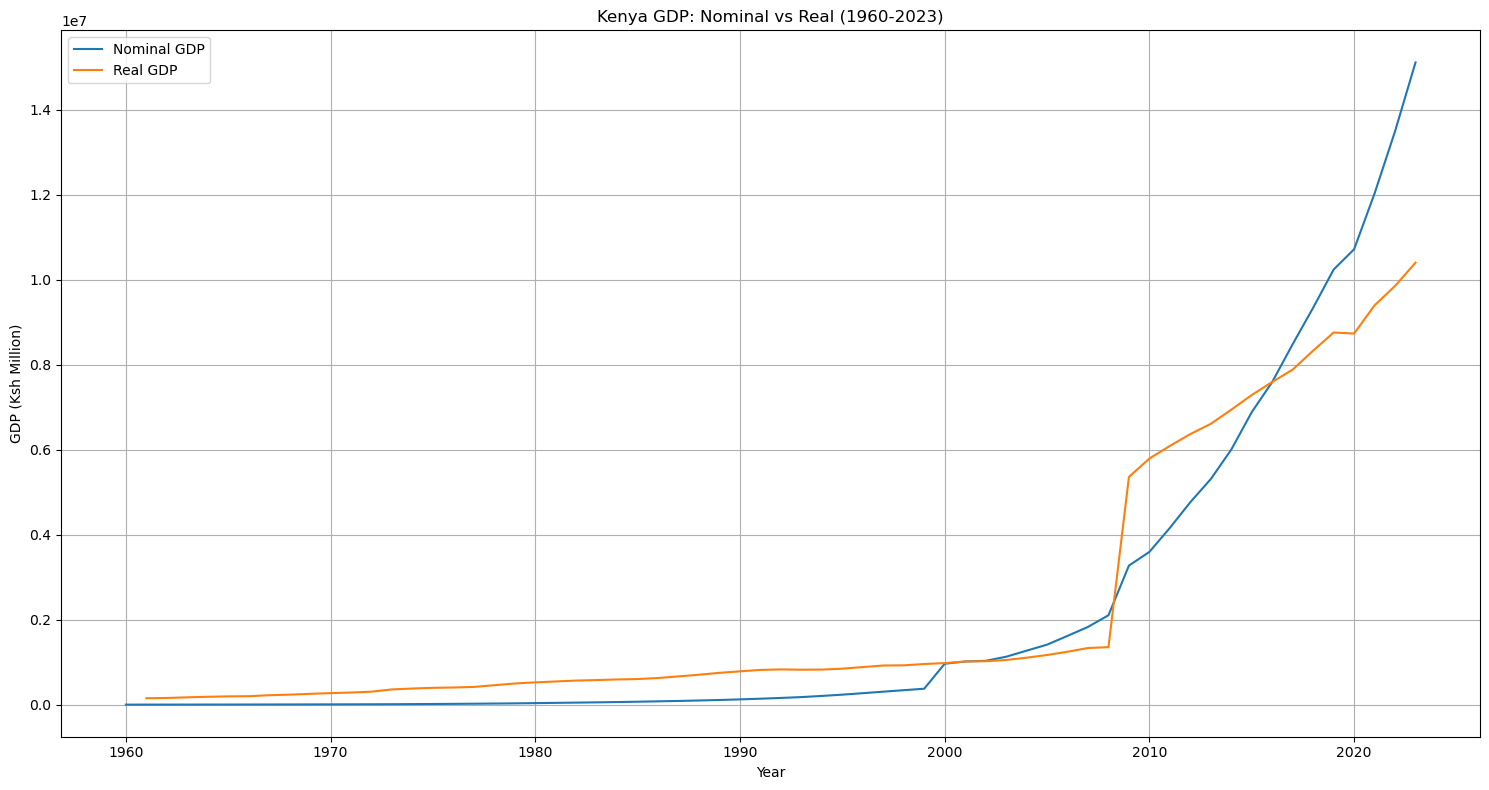

In [34]:
# Create a visualization to verify our results
plt.figure(figsize=(15, 8))
plt.plot(data["Year"], data["Nominal GDP (Ksh Million)"], label="Nominal GDP")
plt.plot(data["Year"], data["Real GDP (Ksh Million)"], label="Real GDP")
plt.title("Kenya GDP: Nominal vs Real (1960-2023)")
plt.xlabel("Year")
plt.ylabel("GDP (Ksh Million)")
plt.legend()
plt.grid(True)
plt.tight_layout()

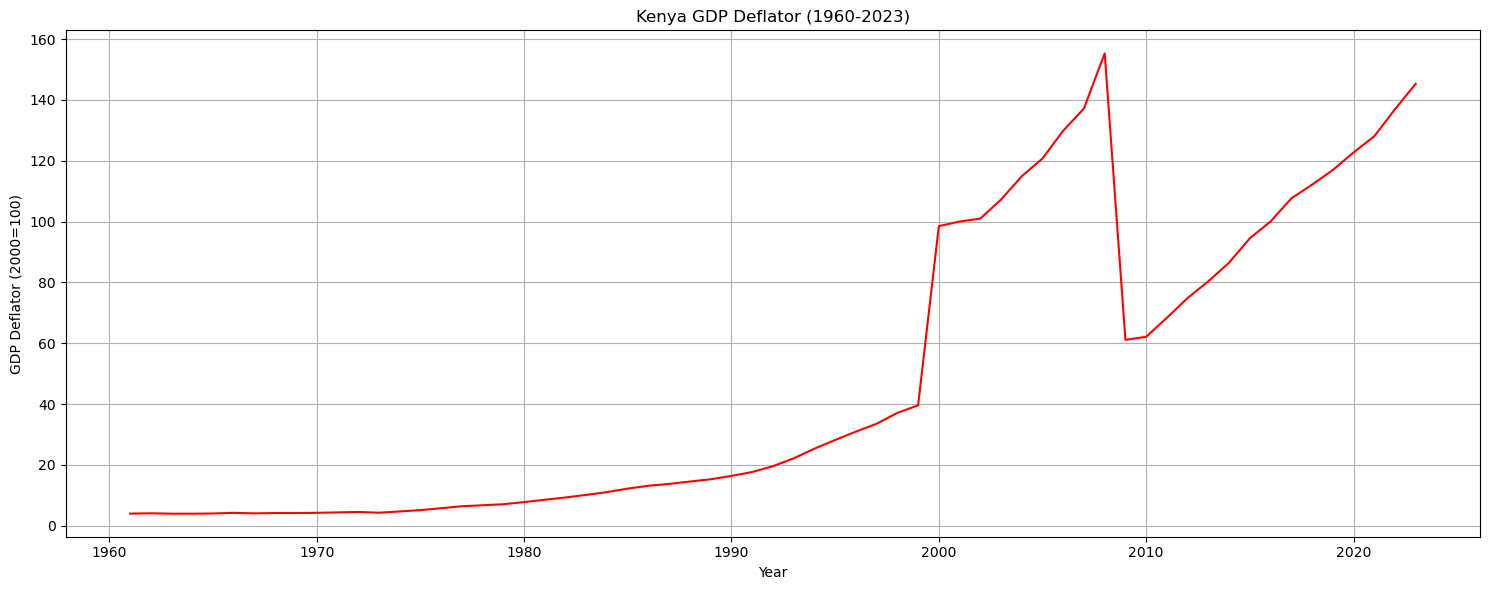

In [35]:
# Add a second plot for the GDP deflator
plt.figure(figsize=(15, 6))
plt.plot(data["Year"], data["GDP Deflator"], "r-")
plt.title("Kenya GDP Deflator (1960-2023)")
plt.xlabel("Year")
plt.ylabel("GDP Deflator (2000=100)")
plt.grid(True)
plt.tight_layout()

In [36]:
# Output the results
result = data[
    [
        "Year",
        "Nominal GDP (Ksh Million)",
        "Annual GDP Growth (%)",
        "Real GDP (Ksh Million)",
        "GDP Deflator",
    ]
]
print("First 10 rows of estimated data:")
print(result.head(10))
print("\nLast 10 rows with actual data:")
print(result.tail(10))

First 10 rows of estimated data:
   Year  Nominal GDP (Ksh Million)  Annual GDP Growth (%)  \
0  1960                       5900                    NaN   
1  1961                       6200                    3.8   
2  1962                       6600                    9.2   
3  1963                       7000                    7.5   
4  1964                       7500                    4.8   
5  1965                       8000                    2.1   
6  1966                       8600                   11.5   
7  1967                       9200                    5.8   
8  1968                      10000                    7.9   
9  1969                      10800                    6.5   

   Real GDP (Ksh Million)  GDP Deflator  
0                     NaN           NaN  
1           156210.891817      3.968993  
2           162146.905706      4.070383  
3           177064.421031      3.953363  
4           190344.252608      3.940229  
5           199480.776733      4.010411  
6

In [37]:
# Save the complete dataset
result.to_csv("Kenya_GDP_Complete.csv", index=False)

print("\nComplete dataset saved as 'Kenya_GDP_Complete.csv'")


Complete dataset saved as 'Kenya_GDP_Complete.csv'
